# Inferencia Estadística 1

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # Para datasets de R

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 19.0 MB/s eta 0:00:00


## Set de Datos

En esta clase se utlizará el Set de Datos de bienes raíces de Ames en Iowa, USA.
Para descargar el set de datos se debe correr la siguiente celda:

In [ ]:
!pip install kagglehub -q # permite descargar datos desde kaggle
import kagglehub
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("marcopale/housing") # descargamos el set de datos
shutil.copytree(path, os.getcwd()+'/housing') # lo movemos a una direccion conocida

FileExistsError: [Errno 17] File exists: '/content/housing'

Para poder ver que tipos de datos se encuentran en el set de datos. Se pueden utilizar las siguientes funciones:

In [ ]:
import pandas as pd
datos = pd.read_csv('housing/AmesHousing.csv')
print('Número de Columnas', datos.shape[1])
print('Número de Filas', datos.shape[0])
datos.head()

Número de Columnas 82
Número de Filas 2930


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


El set de datos tiene 82 columnas, que describen diferentes características de las viviendas, y 2930 vividendas diferentes.

Para más información pueden referirse a: https://www.kaggle.com/datasets/marcopale/housing

## Variabilidad en Estimadores

En esta instancia, las variables que nos van a interesar para cada casa son:
- PID: Parcel Identification Number o el ID de la casa
- Lot Area: El área de la casa
- SalePrice: Precio de venta de la casa

Utilizando `Pandas`, se puede extraer solamente estas columnas de forma de facilitar el manejo de los datos.

Existen diferentes formas de poder extraer o seleccionar datos desde un dataframe de `Pandas`. Un ejemplo es loc, iloc y at, pero pueden ver más en [Documentación de Pandas](https://pandas.pydata.org/docs/user_guide/indexing.html).

In [ ]:
clean_df = datos.loc[:, ['PID', 'Lot Area', 'SalePrice']]
clean_df.head()

,PID,Lot Area,SalePrice
0,526301100,31770,215000
1,526350040,11622,105000
2,526351010,14267,172000
3,526353030,11160,244000
4,527105010,13830,189900


### Estimaciones Puntuales y Muestrales

Es posible extraer muestras desde los datos, y a partir de estos calcular estimadores muestrales.

En primer lugar, extraer datos de la población se puede realizar con todos los datos. Esto define la **estimación puntual**, esta corresponde a un valor único de nuestra muestra que mejor representa algun estimador puntual (media, mediana, etc).

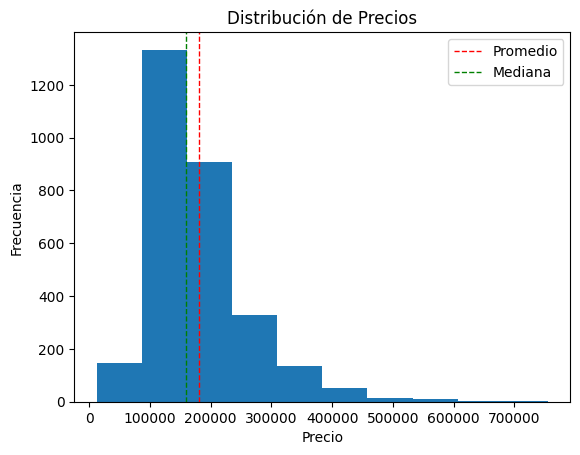

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
fig, ax = plt.subplots()
n, bins, patches = ax.hist(prices_df)
ax.set_title('Distribución de Precios')
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencia')
mean_price = np.mean(prices_df)
median_price = np.median(prices_df)
ax.axvline(mean_price, color='r', linestyle='dashed', linewidth=1, label = 'Promedio')
ax.axvline(median_price, color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
ax.legend()
plt.show()

Luego, para datos muestrales, es necesario extraer muestras de la población original.

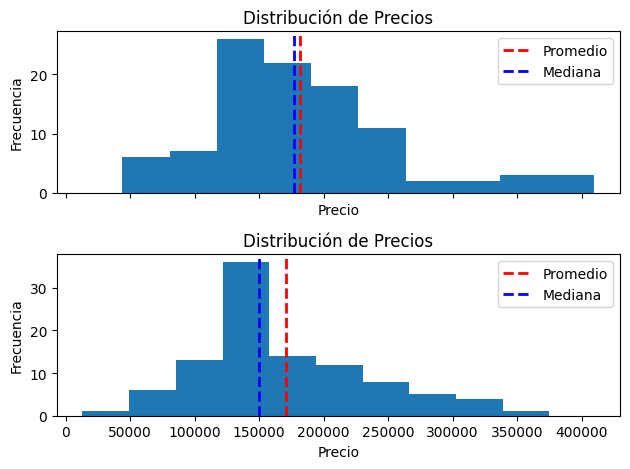

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
fig, ax = plt.subplots(2,1 , sharex = True)

muestra1 = prices_df.sample(100, random_state=42)
n, bins, patches = ax[0].hist(muestra1)
ax[0].set_title('Distribución de Precios')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
mean_price = np.mean(muestra1)
median_price = np.median(muestra1)
ax[0].axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label = 'Promedio')
ax[0].axvline(median_price, color='b', linestyle='dashed', linewidth=2, label = 'Mediana')
ax[0].legend()

muestra2 = prices_df.sample(100, random_state = 43)
n, bins, patches = ax[1].hist(muestra2)
ax[1].set_title('Distribución de Precios')
ax[1].set_xlabel('Precio')
ax[1].set_ylabel('Frecuencia')
mean_price = np.mean(muestra2)
median_price = np.median(muestra2)
ax[1].axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label = 'Promedio')
ax[1].axvline(median_price, color='b', linestyle='dashed', linewidth=2, label = 'Mediana')
ax[1].legend()

fig.tight_layout()
plt.show()

Como se vio, si se quieren extraer muestras desde la población es posible utilizar el [método](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) `.sample()` de un DataFrame de Pandas.


Por otro lado, la **distribución muestral** corresponde a todas las distribuciones de esitmaciones puntuales que se pueden obtener a partir de una muestra de tamaño fijo. Para esto, es necesario obtener el estimador puntual en cada una de las muestras, para esto es posible generar un *loop* de forma de obtener una cantidad definida de puntos.

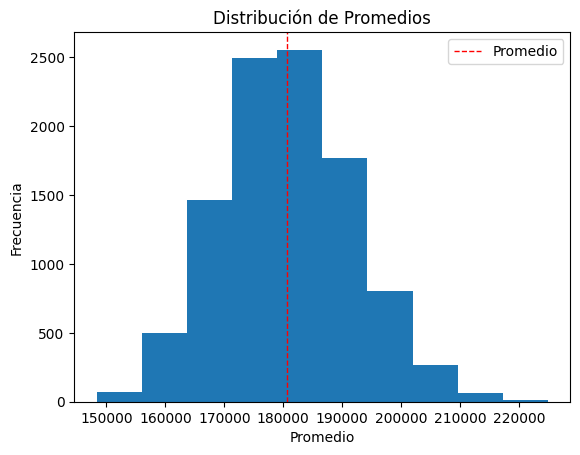

In [ ]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(10_000): # cantidad de muestras
    muestra_i = prices_df.sample(50, random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots()
mean_promedio = np.mean(promedio_muestras)
ax.hist(promedio_muestras)
ax.set_title('Distribución de Promedios')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=1, label = 'Promedio')
ax.legend()
plt.show()


A la distribución muestrada es posible calcular el error estandar. Este permite cuantificar la incertidumbre de nuestra estimación puntual de la muestra. En este caso, estamos calculando el error estandar del promedio muestral.

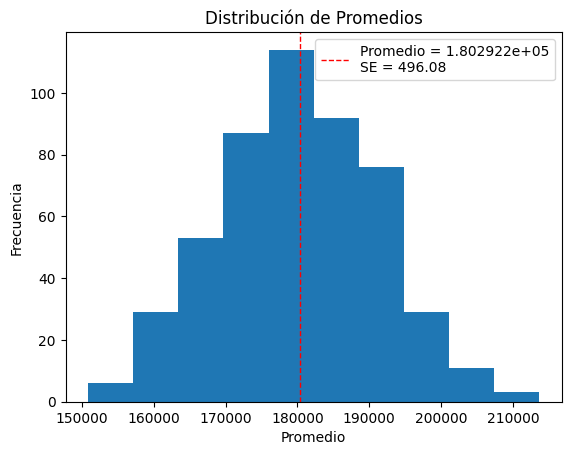

In [ ]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(50, random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots()
mean_promedio = np.mean(promedio_muestras)
se = np.std(promedio_muestras) / np.sqrt(len(promedio_muestras))
ax.hist(promedio_muestras)
ax.set_title('Distribución de Promedios')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=1, label = f'Promedio = {mean_promedio:3e}\nSE = {se:.2f}')
ax.legend()
plt.show()

A medida que $n\to∞$ el error estándar del primedio muestral se acerca a 0. De esta forma, tenemos:

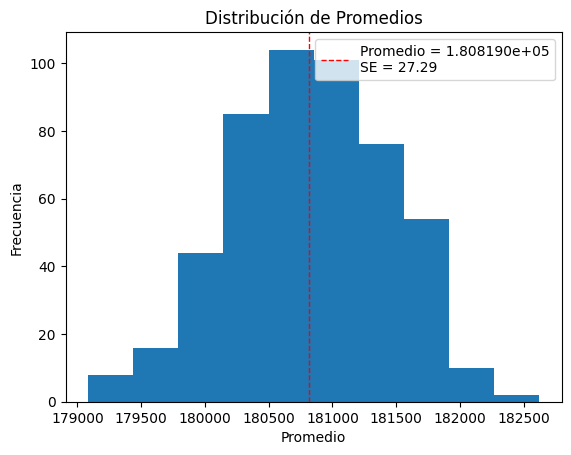

In [ ]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(2500, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots()
mean_promedio = np.mean(promedio_muestras)
se = np.std(promedio_muestras) / np.sqrt(len(promedio_muestras))
ax.hist(promedio_muestras)
ax.set_title('Distribución de Promedios')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=1, label = f'Promedio = {mean_promedio:3e}\nSE = {se:.2f}')
ax.legend()
plt.show()

## Teorema del Límite Central

En términos prácticos, el **Teorema del Límite Central** dice que la distribución muestral es aproximadamente normal, centrado en torno al promedio poblacional, considerando que el tamaño de la muestra es suficientemente grande para compensar la asimetría.

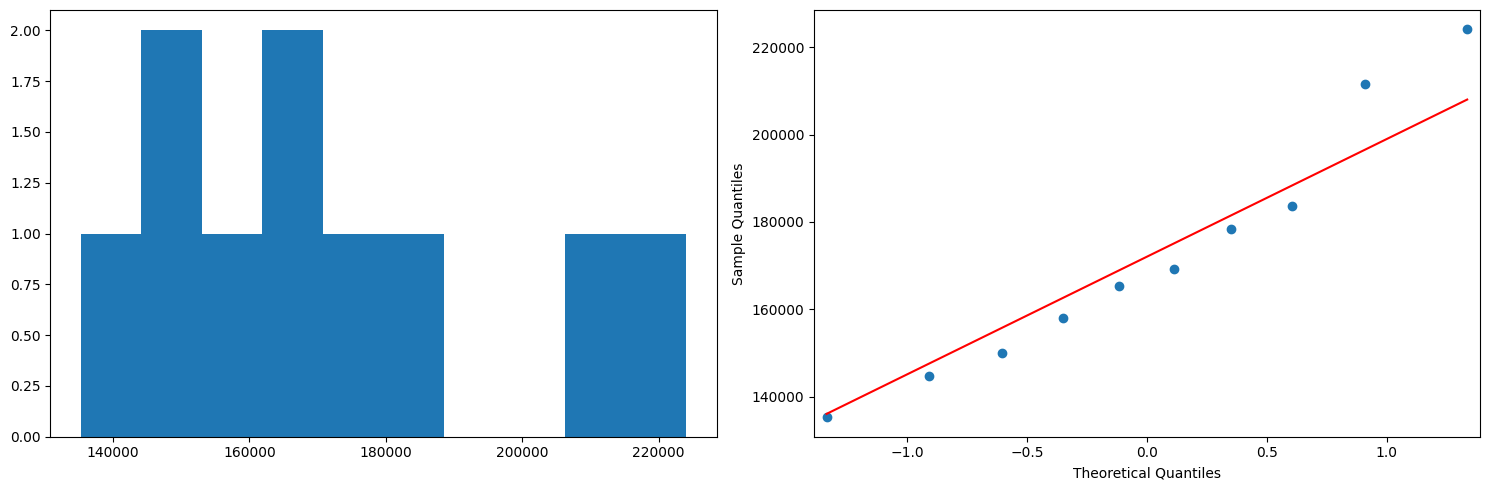

In [ ]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(10): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)
sm.qqplot(np.array(promedio_muestras), line='s', ax=ax[1])
fig.tight_layout()
plt.show()

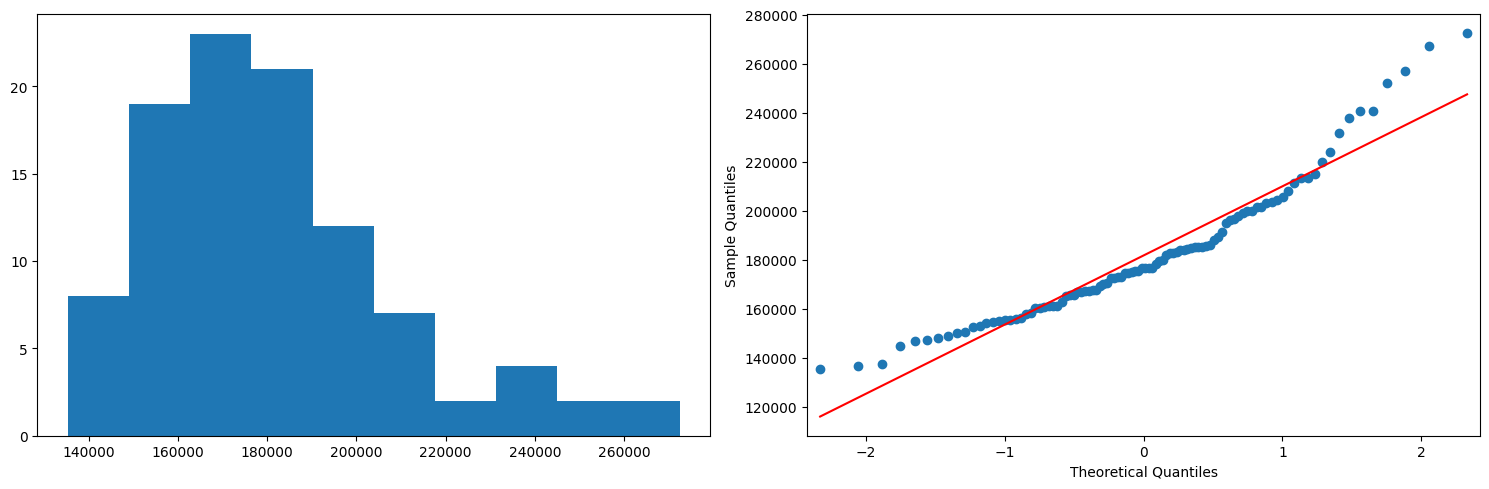

In [ ]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(100): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)
sm.qqplot(np.array(promedio_muestras), line='s', ax = ax[1])
fig.tight_layout()
plt.show()

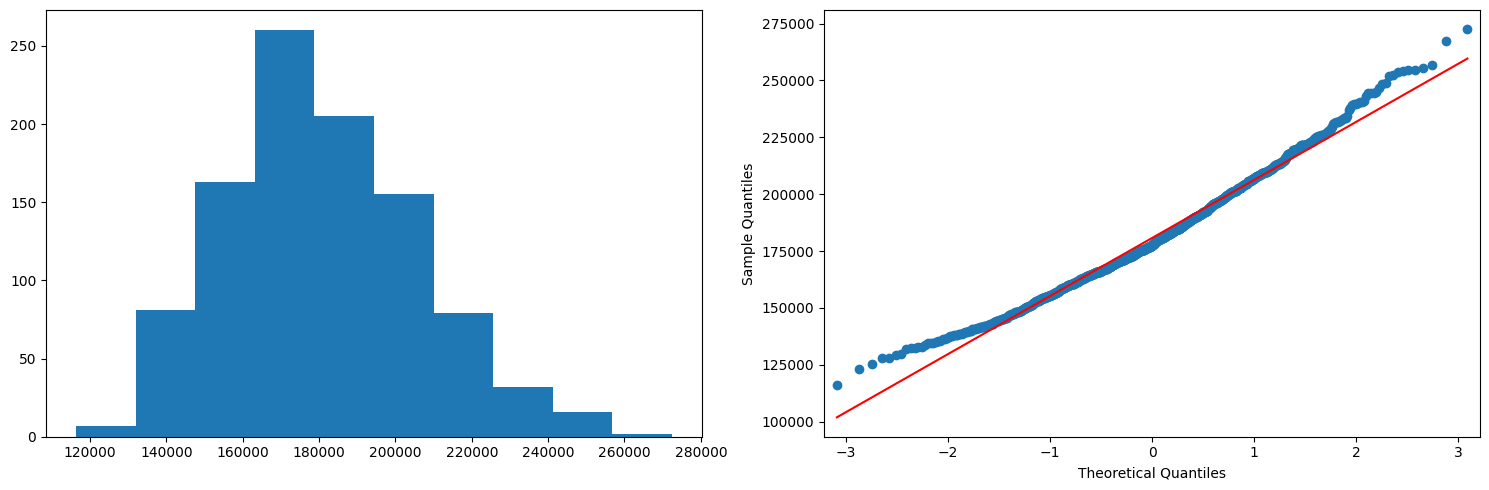

In [ ]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = clean_df['SalePrice'] # Extraemos los datos de precios
for i in range(1000): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)

sm.qqplot(np.array(promedio_muestras), line='s', ax = ax[1])
fig.tight_layout()
plt.show()

Al ver los QQ-plots, a medida que las muestras se acercan a una distribución normal.

## Intervalos de Confianza

La estimación de un parámetro poblacional a partir de una estimación puntual contiene inherentes errores, sinedo estos dependientes del tamaño de la muestra. Los intervalos de confianza nos permiten entregar un rango de valores donde estimamos, con un cierto nivel de confianza, que el parámetro poblacional se encuentra en él.

Para calcular los intervalos de confianza en `Python` es posible utilizar la libreria scipy. En este caso, se puede utilizar el Teorema del Límite Central y utilizar la distribución muestral.


In [ ]:
# para el caso en particular de la distribución muestral de la media
import scipy.stats as st
data = prices_df = clean_df['SalePrice'] # Extraemos los datos de precios

ci_data = st.norm.interval(confidence=0.95, # el intervalo de confianza
                 loc=np.mean(data),
                 scale=st.sem(data)) #st.sem calcula el SE de la media
print(
    f'Intervalo de confianza: {ci_data[0]:.2f} - {ci_data[1]:.2f}'
)

Intervalo de confianza: 177903.46 - 183688.66


## Test de Hipótesis

Los Test de Hipótesis permiten determinar, con cierto nivel de confianza, que determinada asunción es real o falsa.

En el caso planteado del Dr. Nullsheimer vs Altshuler:

In [ ]:
n = 500
prom_muestral = 48
des_est = 15.3

err_std = np.round(des_est / np.sqrt(n), 1) # redondeamos
print(f'Error estándar: {err_std}')

z_critico = st.norm.ppf(0.975) # 1-alpha/2
corte_inferior = prom_muestral - z_critico * err_std
corte_superior = prom_muestral + z_critico * err_std
print(f'Corte Inferior: {corte_inferior:.2f}')
print(f'Corte Superior: {corte_superior:.2f}')
print(f'Valor Nulo: 50')

Error estándar: 0.7
Corte Inferior: 46.63
Corte Superior: 49.37
Valor Nulo: 50


Dado a que el valor nulo $\mu_1 = 50$ se rechaza la hipótesis nula.

## Caso de Estudio: Horas de Sueño

In [ ]:
import rdatasets # utilizamos este paquete para obtener datos desde R
dataset = rdatasets.data("openintro","student_sleep")
horas_sueno = dataset['hours']


Error estándar: 0.16615045931769218


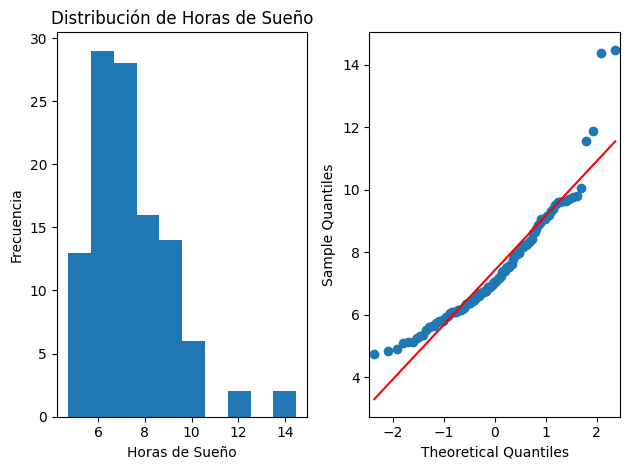

Valor Z: 2.5272821551831743
Valor P: 0.005747455584977912
Dado a que 0.006 < 0.05, rechazamos la hipótesis nula a un 5% nivel de confianza.


In [ ]:
# Realizamos un test de hiposis
# H0: mu = 7
# Ha: mu > 7

# Calculamos el estimador puntual (promedio y error estandar)
alpha = 0.05
n = horas_sueno.shape[0]
prom_muestra = np.mean(horas_sueno)
sd_muestra = np.std(horas_sueno)
se_muestra = sd_muestra / np.sqrt(n) # redondeamos
print(f'Error estándar: {se_muestra}')

# Independencia: Dado que fue una muestra aleatorioa y menor al 10% de la población
# Podemos asumir independencia
# Normalidad: Se puede ver en el siguiente gráfico

fig, ax = plt.subplots(1,2)
sm.qqplot(horas_sueno, line='s', ax=ax[1])
ax[0].hist(horas_sueno, bins = 10)
ax[0].set_title('Distribución de Horas de Sueño')
ax[0].set_xlabel('Horas de Sueño')
ax[0].set_ylabel('Frecuencia')
fig.tight_layout()
plt.show()

# Prueba estadística

valorz = (prom_muestra - 7)/se_muestra
valorp = 1-st.norm.cdf(valorz, loc = 0, scale = 1)
valorp < alpha
print(f'Valor Z: {valorz}')
print(f'Valor P: {valorp}')
print(f'Dado a que {valorp:.3f} < {alpha}, rechazamos la hipótesis nula a un 5% nivel de confianza.')

### Pruebas estadísticas con Python

Python, específicamente `scipy.stats` permite realizar pruebas estadísticas de forma sencilla e intuitiva. Para esto, pueden encontrar todas las pruebas estadísticas disponibles:
- https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions

Dependiendo del tipo de prueba que se quiera probar, diferentes test van a servir. Dentro de estas documentaciones podrán encontrar los supuestos y casos en donde pueden utilizar cada una.